## Q54. テンプレートマッチングSSD

In [14]:
import numpy as np
from PIL import Image
import cv2

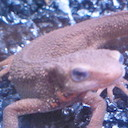

In [49]:
original_image = cv2.cvtColor(cv2.imread('dataset/imori.jpg'), cv2.COLOR_BGR2RGB)
template_image = cv2.cvtColor(cv2.imread('dataset/imori_part.jpg'), cv2.COLOR_BGR2RGB)

display(Image.fromarray(original_image), Image.fromarray(template_image))

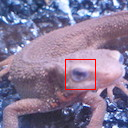

In [ ]:
original_image = original_image.astype(np.float32)
template_image = template_image.astype(np.float32)

H, W, _ = original_image.shape
h, w, _ = template_image.shape

min_eval_value = np.inf
pixel = None

for i in range(0, H-h):
    for j in range(0, W-w):
        scanning_area = original_image[i:i+h, j:j+w]
        eval_value = np.sum((scanning_area-template_image)**2)
        if eval_value < min_eval_value:
            min_eval_value = eval_value
            pixel = (i, j)


top_left = (pixel[1], pixel[0])
bottom_right = (pixel[1]+w, pixel[0]+h)

output = original_image.copy()
# 画像は(y, x)の順だが、矩形座標は(x,y)で指定
cv2.rectangle(output, top_left, bottom_right, color=(255,0,0))

display(Image.fromarray(output.astype(np.uint8)))
